# Wordcount

Counts the number of appearances of each word from a set of files.

In [1]:
import pycompss.interactive as ipycompss

In [2]:
import os
if 'BINDER_SERVICE_HOST' in os.environ:
    ipycompss.start(graph=True, trace=True, debug=False,
                    project_xml='../xml/project.xml',
                    resources_xml='../xml/resources.xml')
else:
    ipycompss.start(graph=True, monitor=1000)  # trace=True

******************************************************
*************** PyCOMPSs Interactive *****************
******************************************************
*          .-~~-.--.           _____       ________  *
*         :         )         |____ \     |____   /  *
*   .~ ~ -.\       /.- ~~ .     ___) |        /  /   *
*   >       `.   .'       <    / ___/        /  /    *
*  (         .- -.         )  | |___   _    /  /     *
*   `- -.-~  `- -'  ~-.- -'   |_____| |_|  /__/      *
*     (        :        )           _ _ .-:          *
*      ~--.    :    .--~        .-~  .-~  }          *
*          ~-.-^-.-~ \_      .~  .-~   .~            *
*                   \ \ '     \ '_ _ -~              *
*                    \`.\`.    //                    *
*           . - ~ ~-.__\`.\`-.//                     *
*       .-~   . - ~  }~ ~ ~-.~-.                     *
*     .' .-~      .-~       :/~-.~-./:               *
*    /_~_ _ . - ~                 ~-.~-._            *
*         

In [3]:
from pycompss.api.task import task
from pycompss.api.parameter import *

In [4]:
@task(returns=dict, file_path=FILE_IN)
def word_count(file_path):
    """
    Read the given file and construct a frequency word dictionary from a list of words.
    :param data: a list of words
    :return: a dictionary where key=word and value=#appearances
    """
    # Read the given file
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data += line.split()
    # Parse the content
    partialResult = {}
    for entry in data:
        if entry in partialResult:
            partialResult[entry] += 1
        else:
            partialResult[entry] = 1
    return partialResult

Found task: word_count


In [5]:
@task(returns=dict, priority=True)
def merge_two_dicts(dic1, dic2):
    """
    Update a dictionary with another dictionary.
    :param dic1: first dictionary
    :param dic2: second dictionary
    :return: dic1+=dic2
    """
    for k in dic2:
        if k in dic1:
            dic1[k] += dic2[k]
        else:
            dic1[k] = dic2[k]
    return dic1

Found task: merge_two_dicts


Main wordcount code:

In [6]:
from pycompss.api.api import compss_wait_on

# Get the dataset path
path_dataset = os.getcwd() + '/dataset'

# Construct a list with the file's paths from the dataset
partial_result = []
for file_name in os.listdir(path_dataset):
    f = os.path.join(path_dataset, file_name)
    partial_result.append(word_count(f))
    
# Accumulate the partial results to get the final result.
result = {}
for partial in partial_result:
    result = merge_two_dicts(result, partial)

# Wait for result
result = compss_wait_on(result)

Now lets see the results:

In [7]:
from pprint import pprint
print("Result:")
pprint(result)
print("Total words: {}".format(sum(result.values())))

Result:
{'Adipisci': 227,
 'Aliquam': 233,
 'Amet': 207,
 'Consectetur': 201,
 'Dolor': 198,
 'Dolore': 236,
 'Dolorem': 232,
 'Eius': 251,
 'Est': 197,
 'Etincidunt': 232,
 'Ipsum': 228,
 'Labore': 229,
 'Magnam': 195,
 'Modi': 201,
 'Neque': 205,
 'Non': 226,
 'Numquam': 253,
 'Porro': 205,
 'Quaerat': 217,
 'Quiquia': 212,
 'Quisquam': 214,
 'Sed': 225,
 'Sit': 220,
 'Tempora': 189,
 'Ut': 217,
 'Velit': 218,
 'Voluptatem': 235,
 'adipisci': 1078,
 'aliquam': 1107,
 'amet': 1044,
 'consectetur': 1073,
 'dolor': 1120,
 'dolore': 1065,
 'dolorem': 1107,
 'eius': 1048,
 'est': 1101,
 'etincidunt': 1114,
 'ipsum': 1061,
 'labore': 1070,
 'magnam': 1096,
 'modi': 1127,
 'neque': 1093,
 'non': 1099,
 'numquam': 1094,
 'porro': 1101,
 'quaerat': 1086,
 'quiquia': 1079,
 'quisquam': 1144,
 'sed': 1109,
 'sit': 1130,
 'tempora': 1064,
 'ut': 1070,
 'velit': 1105,
 'voluptatem': 1121}
Total words: 35409


Plot the results:

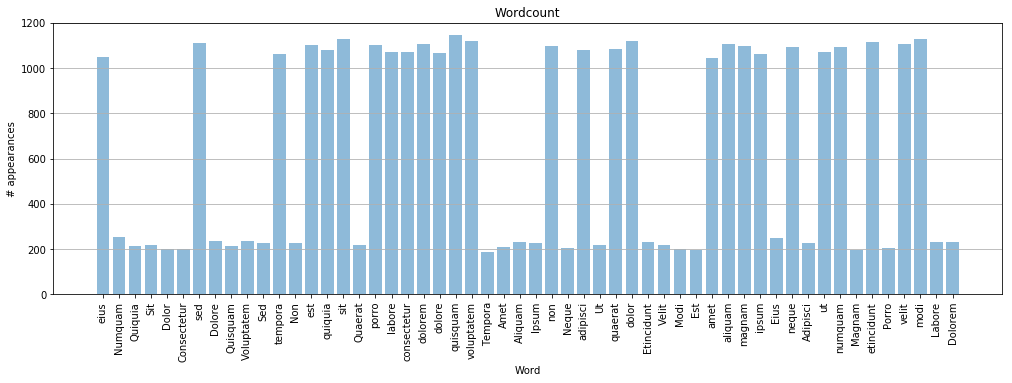

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

words = result.keys()
y_pos = np.arange(len(words))
appearances = result.values()

plt.rcParams['figure.figsize'] = [17, 5]
plt.bar(y_pos, appearances, align='center', alpha=0.5)
plt.grid(axis='y')
plt.xticks(y_pos, words, rotation=90)
plt.ylabel('# appearances')
plt.xlabel('Word')
plt.title('Wordcount')

plt.show()

In [9]:
ipycompss.stop()

****************************************************
*************** STOPPING PyCOMPSs ******************
****************************************************
         have not been brought to the master.
****************************************************
